# Pandas 연습하기

- 데이터: 구글 주식 데이터: Google Stock Price: Daily, Weekly & Monthly (2023)
    - 데이터 링크: https://www.kaggle.com/datasets/r1shabhgupta/google-stock-price-daily-weekly-and-monthly-2023
    - 데이터셋 요약: 2013-05-01 ~ 2023-04-01 까지의 일/주/월 별 데이터

- 실습에는 월 별 데이터를 활용합니다.

## 0. 필요 패키지 설치

In [1]:
# pip install numpy

In [2]:
# pip install pandas

In [3]:
# pip install matplotlib

In [4]:
# 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 데이터 읽어와서 출력하기
  - `pd.read_csv()`: csv 파일을 읽어와 Pandas Dataframe 으로 반환

In [5]:
# CSV 파일 경로
csv_path = "data/google-stock-dataset-Monthly.csv"

# CSV 파일 읽어오기 (첫 번째, 마지막 열 제외)
df = pd.read_csv(csv_path, usecols=range(1, 7))

# DataFrame 출력
df

,Date,Price,High,Low,Close,Volume
0,2013-05-01,20.60,23.04,20.43,21.80,1974715308
1,2013-06-01,21.85,22.79,21.20,22.03,1941280776
2,2013-07-01,22.18,23.22,21.91,22.22,2047770180
3,2013-08-01,22.40,22.77,21.16,21.19,1338144516
4,2013-09-01,21.38,22.67,21.37,21.92,1323615060
...,...,...,...,...,...,...
115,2022-12-01,101.02,102.25,85.94,88.23,603127800
116,2023-01-01,89.59,100.32,84.86,98.84,672897800
117,2023-02-01,98.71,108.18,88.58,90.06,952580200
118,2023-03-01,89.98,106.59,89.42,103.73,859911400


### 데이터 설명
  - `Date`: 주식 가격 데이터가 기록된 특정 날짜
  - `Price`: 해당 날짜 주식 가격의 개장 후 첫 거래 가격.
  - `High`: 해당 거래일에 주식의 최고 가격
  - `Low`: 해당 거래일에 주식의 최저 가격
  - `Close`: 해당 거래일의 종가(마지막 거래 가격)입니다.
  - `Volume`: 주식 거래량. 해당 거래일에 주식이 거래된 총 주식 수입니다.

In [6]:
df.dtypes

Date       object
Price     float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

## 2. 종가 데이터를 사용하여 그래프 만들어보기

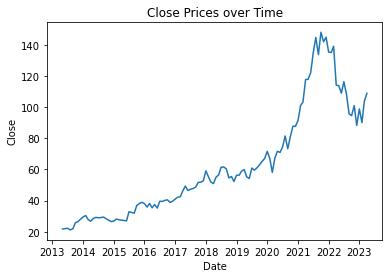

In [7]:
# 날짜 데이터 변환
df["Date"] = pd.to_datetime(df["Date"])

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df['Date'], df['Close'])


# 그래프 제목 설정
plt.title('Close Prices over Time')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close')

# 그래프 표시
plt.show()

## 3. 최저, 최고가 출력하기

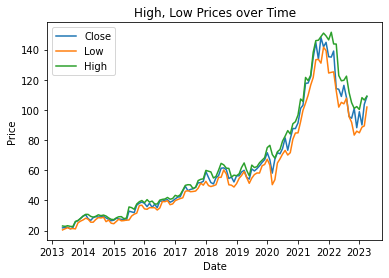

In [8]:
# 그래프 그리기
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df['Date'], df['High'], label='High')

# 그래프 제목 설정
plt.title('High, Low Prices over Time')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

## 4. 데이터 가공 - 2022 년 이후의 최고, 최저가만 출력하기

In [6]:
# CSV 파일 경로
csv_path = "data/google-stock-dataset-Monthly.csv"

# CSV 파일 읽어오기 (첫 번째, 마지막 열 제외)
new_df = pd.read_csv(csv_path, usecols=range(1, 7))

# 2022년 이후 데이터 필터링
df_after_2022 = new_df[new_df["Date"] >= "2022-01-01"]

# 출력하기
df_after_2022

,Date,Price,High,Low,Close,Volume
104,2022-01-01,145.05,146.49,124.50,135.30,767206000
105,2022-02-01,137.59,151.55,124.95,135.06,928126000
106,2022-03-01,134.88,143.79,125.28,139.07,729162000
107,2022-04-01,139.50,143.71,112.74,114.11,761152000
108,2022-05-01,113.40,122.85,101.88,113.76,850450000
109,2022-06-01,114.86,119.35,105.05,108.96,770754000
110,2022-07-01,107.93,119.68,104.07,116.32,789529700
111,2022-08-01,115.30,122.43,107.80,108.22,515852700
112,2022-09-01,108.28,111.62,95.56,95.65,613278900
113,2022-10-01,96.76,104.82,91.80,94.51,681488300


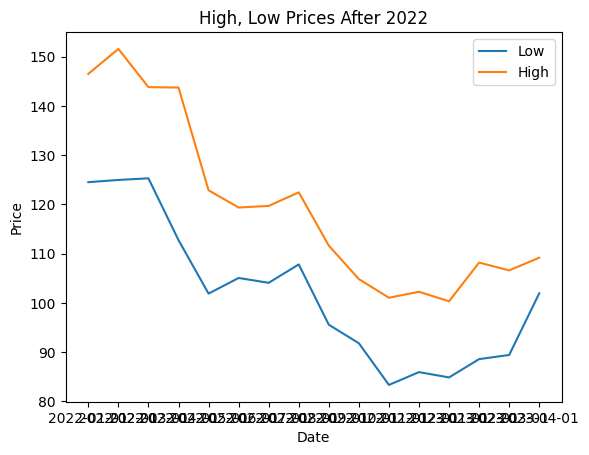

In [7]:
# 그래프 그리기
plt.plot(df_after_2022['Date'], df_after_2022['Low'], label='Low')
plt.plot(df_after_2022['Date'], df_after_2022['High'], label='High')

# 그래프 제목 설정
plt.title('High, Low Prices After 2022')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

- x 축 가독성 키우기 (회전)

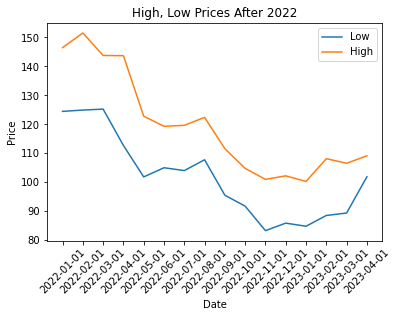

In [11]:
# 그래프 그리기
plt.plot(df_after_2022['Date'], df_after_2022['Low'], label='Low')
plt.plot(df_after_2022['Date'], df_after_2022['High'], label='High')

# 그래프 제목 설정
plt.title('High, Low Prices After 2022')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

## 5. 원화로 바꾸어 출력해보기
  - 최저, 최고가를 원화로 변경하여 출력해보자

In [12]:
# CSV 파일 경로
csv_path = "data/google-stock-dataset-Monthly.csv"

# CSV 파일 읽어오기 (첫 번째, 마지막 열 제외)
df = pd.read_csv(csv_path, usecols=range(1, 7))

# 원화 환율 (예시로 1달러당 1300원으로 가정)
exchange_rate = 1300

# 각 컬럼을 원화로 계산하여 추가
df["High(won)"] = df["High"] * exchange_rate
df["Low(won)"] = df["Low"] * exchange_rate
df["Close(won)"] = df["Close"] * exchange_rate

# 2022년 이후 데이터 필터링
df = df[new_df["Date"] >= "2022-01-01"]

# 수정된 데이터프레임 출력
df

,Date,Price,High,Low,Close,Volume,High(won),Low(won),Close(won)
104,2022-01-01,145.05,146.49,124.50,135.30,767206000,190437.0,161850.0,175890.0
105,2022-02-01,137.59,151.55,124.95,135.06,928126000,197015.0,162435.0,175578.0
106,2022-03-01,134.88,143.79,125.28,139.07,729162000,186927.0,162864.0,180791.0
107,2022-04-01,139.50,143.71,112.74,114.11,761152000,186823.0,146562.0,148343.0
108,2022-05-01,113.40,122.85,101.88,113.76,850450000,159705.0,132444.0,147888.0
109,2022-06-01,114.86,119.35,105.05,108.96,770754000,155155.0,136565.0,141648.0
110,2022-07-01,107.93,119.68,104.07,116.32,789529700,155584.0,135291.0,151216.0
111,2022-08-01,115.30,122.43,107.80,108.22,515852700,159159.0,140140.0,140686.0
112,2022-09-01,108.28,111.62,95.56,95.65,613278900,145106.0,124228.0,124345.0
113,2022-10-01,96.76,104.82,91.80,94.51,681488300,136266.0,119340.0,122863.0


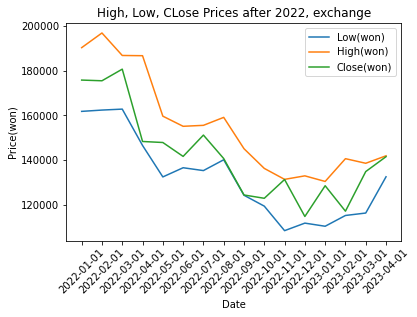

In [13]:
# 그래프 그리기
plt.plot(df['Date'], df['Low(won)'], label='Low(won)')
plt.plot(df['Date'], df['High(won)'], label='High(won)')
plt.plot(df['Date'], df['Close(won)'], label='Close(won)')

# 그래프 제목 설정
plt.title('High, Low, CLose Prices after 2022, exchange')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price(won)')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

## 6. 간단한 분석 예시
- 지난 1년의 최고, 최저, 종가와 현재 종가는 무슨 관계가 있을까 ?

### 상관 관계
  - 두 데이터 간의 관련성이나 연관성을 나타내는 통계적인 개념
  - 데이터들 간의 선형적인 관계를 측정하고, 이 관계의 강도와 방향성을 파악하는 데 사용
  - Pandas 의 `corr()` 메서드 사용
    - "1"에 가까울수록 양의 상관 관계가 강함을 나타냅니다. 즉, 한 변수가 증가하면 다른 변수도 증가하는 경향이 있습니다.
    - "-1"에 가까울수록 음의 상관 관계가 강함을 나타냅니다. 즉, 한 변수가 증가하면 다른 변수는 감소하는 경향이 있습니다.
    - "0"에 가까울수록 두 변수 사이에는 선형적인 상관 관계가 거의 없음을 나타냅니다. 즉, 한 변수의 변화는 다른 변수에 영향을 미치지 않는 것으로 해석됩니다.

In [14]:
# CSV 파일 경로
csv_path = "data/google-stock-dataset-Monthly.csv"

# CSV 파일 읽어오기 (첫 번째, 마지막 열 제외)
df = pd.read_csv(csv_path, usecols=range(1, 7))

# 가장 최근을 제외한 마지막 1년 추출
df = df.tail(13)

# 마지막 개월의 Close 가격
last_month_close = df['Close'].iloc[-1]

# 마지막 개월을 제외한 1년의 데이터와 마지막 개월의 종가 간의 상관 관계
High_Close_corr = df['High'].iloc[:-1].corr(df['Close'])
Low_Close_corr = df['Low'].iloc[:-1].corr(df['Close'])
Volume_Colse_corr = df['Volume'].iloc[:-1].corr(df['Close'])

print(f"지난 1년의 High 가격과 마지막 개월의 Close 가격과의 상관 관계: {High_Close_corr}")
print(f"지난 1년의 평균 최고가: {df['High'].iloc[:-1].mean()}")

print('----------------------------------------------')

print(f"지난 1년의 Low 가격과 마지막 개월의 Close 가격과의 상관 관계: {Low_Close_corr}")
print(f"지난 1년의 평균 최저가: {df['Low'].iloc[:-1].mean()}")

print('----------------------------------------------')

print(f"지난 1년의 거래량과 마지막 개월의 Close 가격과의 상관 관계: {Volume_Colse_corr}")
print(f"지난 1년의 평균 거래량: {df['Volume'].iloc[:-1].mean()}")

print('----------------------------------------------')

지난 1년의 High 가격과 마지막 개월의 Close 가격과의 상관 관계: 0.7467644674963533
지난 1년의 평균 최고가: 113.57
----------------------------------------------
지난 1년의 Low 가격과 마지막 개월의 Close 가격과의 상관 관계: 0.7784705369457524
지난 1년의 평균 최저가: 95.92
----------------------------------------------
지난 1년의 거래량과 마지막 개월의 Close 가격과의 상관 관계: 0.16764687924467012
지난 1년의 평균 거래량: 732295458.3333334
----------------------------------------------


- 그래프를 출력하며 분석을 해보자

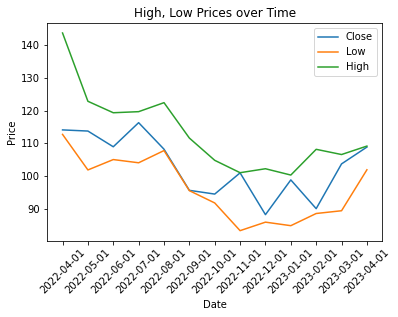

In [15]:
# 그래프 그리기
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df['Date'], df['High'], label='High')

# 그래프 제목 설정
plt.title('High, Low Prices over Time')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

### 분석 결과
- 지난 1년의 High 가격과 마지막 개월의 Close 가격과의 상관 관계: 0.74
- 지난 1년의 Low 가격과 마지막 개월의 Close 가격과의 상관 관계: 0.77
- 일반적으로 0.7 이상의 점수: 강한 상관 관계
- 즉, High, Low 값에 Close 가격이 비례하는 성향이 있다!
  - 3월과 4월의 최고가, 최저가가 상향하는 것으로 보인다!
  - 5월에도 오를 것으로 보이니 매수하자! (잘못된 분석)

### 상관 관계 분석 시 주의사항
- 상관 관계가 높다고 해서 원인과 결과 사이에 직접적인 인과 관계가 있다고 가정해서는 안됩니다.
- 예를 들어, "날씨가 더워질수록 아이스크림 판매량이 증가한다" 처럼 연관이 있을 수는 있으나, 직접적인 원인이 될 수는 없습니다!
  - 상관 관계를 통해 변수들 간의 연관성을 파악할 수 있지만, 인과 관계를 정확히 파악하려면 추가적인 연구와 분석이 필요합니다.
  - 다른 요인들이 포함된 복잡한 시스템에서는 인과 관계를 추론하기 위해 실험 설계나 다른 분석 방법을 사용해야 합니다.
- `위의 예시처럼 잘못된 분석 결과를 내지 않도록 주의 하며 데이터 분석을 진행`해야 합니다.